In [69]:
import random
import graphviz as gv
import csv
import heapq as hq
import numpy as np
import math

def HoraDia():
  Hora = (random.randint(100,2400))/100
  return Hora

def Trafico():
  TraficoCaraba = HoraDia()
  NivelTra=0
  if(TraficoCaraba > 7.00 and TraficoCaraba < 8.30 or TraficoCaraba> 18.30 and TraficoCaraba< 20.00):
    NivelTra = 1 
  if(TraficoCaraba> 16.30 and TraficoCaraba< 19.00):
    NivelTra = 2
  if(TraficoCaraba > 6.30 and TraficoCaraba < 10.00 or TraficoCaraba> 17.00 and TraficoCaraba< 21.00):
    NivelTra = 3

  return NivelTra

Trafico()

3

In [70]:
Calles1=[]
with open("LibroPrueba.csv") as archivo:
  reader=csv.reader(archivo)
  for row in reader:
    Calles1.append(row)

In [71]:
Calles1

[['Aux.TupacAmaru', 'Central'],
 ['Aux.TupacAmaru', 'LosCrisantemos'],
 ['Aux.TupacAmaru', 'CaminoReal'],
 ['Aux.TupacAmaru', 'ElDorado'],
 ['Aux.TupacAmaru', 'Florales'],
 ['Aux.TupacAmaru', 'Miraflores'],
 ['Aux.TupacAmaru', 'Lazmines']]

In [83]:
labels=[]
def show(Grafo, labels=None, dirigido=False, peso=False, path=[], layout="sfdp"):
  grafo = gv.Digraph("alegria") if dirigido else gv.Graph("felicidad")
  grafo.graph_attr["layout"] = layout
  grafo.edge_attr["color"] = "gray"
  grafo.edge_attr["fontsize"] = "8"
  grafo.node_attr["color"] = "orangered"
  grafo.node_attr["width"] = "0.1"
  grafo.node_attr["height"] = "0.1"
  grafo.node_attr["fontsize"] = "8"
  grafo.node_attr["fontcolor"] = "mediumslateblue"
  n = len(Grafo)
  for fila in range(n):
    grafo.node(str(fila), labels[fila] if labels else str(fila))

  added = set()
  for columna, fila in enumerate(path):
    if fila >= 0:
      if peso:
        for vi, espacio in Grafo[fila]:
          if vi == columna:
            break

        grafo.edge(str(fila), str(columna), str(espacio), dir="forward", penwidt="2", color="orange")
      else:
        grafo.edge(str(fila), str(columna), dir="forward", penwidt="2", color="orange")

      added.add(f"{fila}->{columna}")
      added.add(f"{columna}->{fila}")
    #peso
  if peso:
    for fila in range(n):
      for columna, espacio in Grafo[fila]:
        if not dirigido and not f"{fila}->{columna}" in added:
          added.add(f"{fila}->{columna}")
          added.add(f"{columna}->{fila}")
          grafo.edge(str(fila), str(columna), str(espacio))
        elif dirigido:
          grafo.edge(str(fila), str(columna), str(espacio))
  else:
    for fila in range(n):
      for columna in Grafo[fila]:
        if not dirigido and not f"{fila}->{columna}" in added:
          added.add(f"{fila}->{columna}")
          added.add(f"{columna}->{fila}")
          grafo.edge(str(fila), str(columna))
        elif dirigido:
          grafo.edge(str(fila), str(columna))
  return grafo

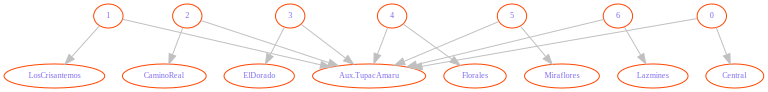

In [81]:
show(Calles1, dirigido=True, labels=labels, layout="dot")


In [84]:
show(Calles1, dirigido=True, peso=True, labels=labels, layout="dot")

ValueError: ignored